In [11]:
"""
後で使う関数の定義
"""

def linestyle_generator():
    """グラフをプロットするときの線種を決めるジェネレータ"""
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

def plot_set(fig_ax, *args):
    """グラフを整える"""
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args) == 3:
        fig_ax.legend(loc=args[2])

def bodeplot_set(fig_ax, *args):
    """ボード線図を整える"""
    # ゲイン線図
    fig_ax[0].grid(which="both", ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')

    # 位相線図
    fig_ax[1].grid(which="both", ls=':')
    fig_ax[1].set_xlabel('omega [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')

    # 凡例
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

c:\Users\asei\control.py\.venv\Lib\site-packages\control\timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


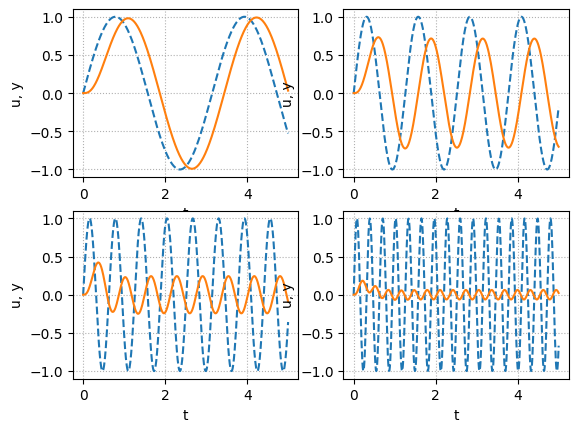

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from control.matlab import tf, lsim

fig, ax = plt.subplots(2, 2)

# 2次遅れ系
zeta = 0.7
omega_n = 5
P = tf([omega_n**2], [1, 2*zeta*omega_n, omega_n**2])

# 周波数を変える
freq = [2, 5, 10, 20]
Td = np.arange(0, 5, 0.01)

for i in range(2):
    for j in range(2):
        # 正弦波入力
        u = np.sin(freq[2 * i + j] * Td)

        # P を伝達関数モデルで与えているのに、状態空間モデルとして応答を求めているので、
        # 警告が出てしまう。無視して進める。
        y, t, _ = lsim(sys=P, U=u, T=Td, X0=0)

        ax[i, j].plot(t, u, ls="--", label='u')
        ax[i, j].plot(t, y, label='y')
        plot_set(ax[i, j], 't', 'u, y')

c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
c:\Users\asei\control.py\.venv\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


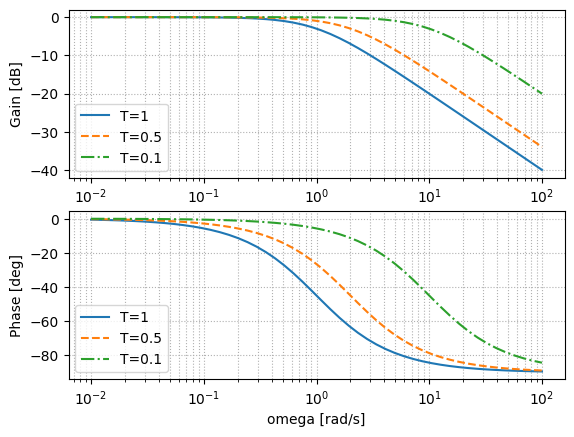

In [13]:
from control.matlab import tf, bode, logspace, mag2db

LS = linestyle_generator()
fig, ax = plt.subplots(2, 1)

K = 1
Ts = [1, 0.5, 0.1]

for t in Ts:
    P = tf([K], [t, 1])
    mag, phase, w = bode(P, logspace(-2, 2), plot=False)
    pltargs = {'ls': next(LS), 'label': f'T={t}'}
    ax[0].semilogx(w, mag2db(mag), **pltargs)
    ax[1].semilogx(w, np.rad2deg(phase), **pltargs)

bodeplot_set(ax, 3, 3)